<a href="https://colab.research.google.com/github/shenallll/DSPL_ICW_SKP/blob/main/MODELLING_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Model 01 - Extreme Gradient Boosting**

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform, randint

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load dataset
train_data = pd.read_csv("/content/drive/MyDrive/DSPL Cw/preprocessed_data final.csv")

# Display first few rows
train_data.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
0,10493832,Kelaniya,1209.60,756.00,5292.00,4
1,10178643,Moratuwa,1590.12,1060.08,6007.12,1
2,10513916,Wattala,2288.88,1481.04,9155.52,4
3,10334589,Wattala,2274.94,1739.66,9099.76,4
4,10458365,Kelaniya,2345.49,2069.55,9243.99,4


In [ ]:
train_data = train_data.drop(columns=['Customer_ID'])
print(train_data.columns)

Index(['outlet_city', 'luxury_sales', 'fresh_sales', 'dry_sales',
       'cluster_catgeory'],
      dtype='object')


In [ ]:
train_data.dtypes

,0
outlet_city,object
luxury_sales,float64
fresh_sales,float64
dry_sales,float64
cluster_catgeory,int64


In [ ]:
train_data["outlet_city"] = train_data["outlet_city"].astype("category")

In [ ]:
train_data.dtypes

,0
outlet_city,category
luxury_sales,float64
fresh_sales,float64
dry_sales,float64
cluster_catgeory,int64


In [ ]:
mapping = {1:0, 2:1, 3:2, 4:3, 5:4, 6:5}
train_data["cluster_catgeory"] = train_data["cluster_catgeory"].map(mapping)

In [ ]:
X = train_data.iloc[:, :-1]
y = train_data.iloc[:, -1]

In [ ]:
print(X)

       outlet_city  luxury_sales  fresh_sales  dry_sales
0         Kelaniya       1209.60       756.00    5292.00
1         Moratuwa       1590.12      1060.08    6007.12
2          Wattala       2288.88      1481.04    9155.52
3          Wattala       2274.94      1739.66    9099.76
4         Kelaniya       2345.49      2069.55    9243.99
...            ...           ...          ...        ...
739059     Colombo       1644.80      1593.40    1747.60
739060     Colombo       3796.80      3678.15    3915.45
739061  Katunayake       2624.65      2249.70    3915.45
739062  Katunayake       2389.76      2240.40    2613.80
739063     Gampaha       3893.40      3893.40    3448.44

[739064 rows x 4 columns]


In [ ]:
print(y)

0         3
1         0
2         3
3         3
4         3
         ..
739059    2
739060    2
739061    2
739062    2
739063    2
Name: cluster_catgeory, Length: 739064, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train)

                   outlet_city  luxury_sales  fresh_sales  dry_sales
403840                Kalmunai       2359.50      3448.50   12160.50
712708                Kalmunai       1498.20      6592.08    1198.56
208839                   Kotte       1892.94      9464.70    2704.20
696648                  Jaffna       3492.58     12132.12    2757.30
95162                 Moratuwa       1021.28       829.79    4212.78
...                        ...           ...          ...        ...
259178                Homagama       1282.71      7696.26    1982.37
365838                 Gampaha       1498.12      2074.32    7605.84
131932  Dehiwala-Mount Lavinia        971.85       562.65    3427.05
671155                   Galle       1459.20      6019.20    1185.60
121958                Kaduwela        828.00       607.20    3643.20

[591251 rows x 4 columns]


In [ ]:
print(X_test)

                   outlet_city  luxury_sales  fresh_sales  dry_sales
55498                 Moratuwa       1414.40      1060.80    5746.00
127435            Nuwara Eliya       1763.20      1020.80    6124.80
419847                Kalmunai       1291.68      1689.12    6756.48
136971                Homagama       1029.60       629.20    3775.20
110390  Dehiwala-Mount Lavinia       1548.80      1258.40    6582.40
...                        ...           ...          ...        ...
731468              Katunayake       3442.84      3442.84    3341.58
519087                   Kandy       1715.50      2916.35   11322.30
162024                   Kotte       1522.08      1183.84    5496.40
15934   Dehiwala-Mount Lavinia       1808.12      1595.40    6913.40
599877                   Galle       2033.82      7796.31    1468.87

[147813 rows x 4 columns]


In [ ]:
print(y_train)

403840    0
712708    5
208839    1
696648    5
95162     3
         ..
259178    1
365838    0
131932    3
671155    5
121958    3
Name: cluster_catgeory, Length: 591251, dtype: int64


In [ ]:
print(y_test)

55498     3
127435    3
419847    0
136971    3
110390    3
         ..
731468    2
519087    0
162024    3
15934     3
599877    5
Name: cluster_catgeory, Length: 147813, dtype: int64


In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier(enable_categorical = True, max_depth = 5, learning_rate = 0.1, n_estimators = 100, reg_alpha = 1, subsample = 0.8, colsample_bytree = 0.7)

classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred = classifier.predict(X_test)
comparision = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
comparision.head(10)

,Real Values,Predicted Values
55498,3,3
127435,3,3
419847,0,0
136971,3,3
110390,3,3
598718,5,5
488523,0,0
560581,5,5
715078,2,2
21719,3,3


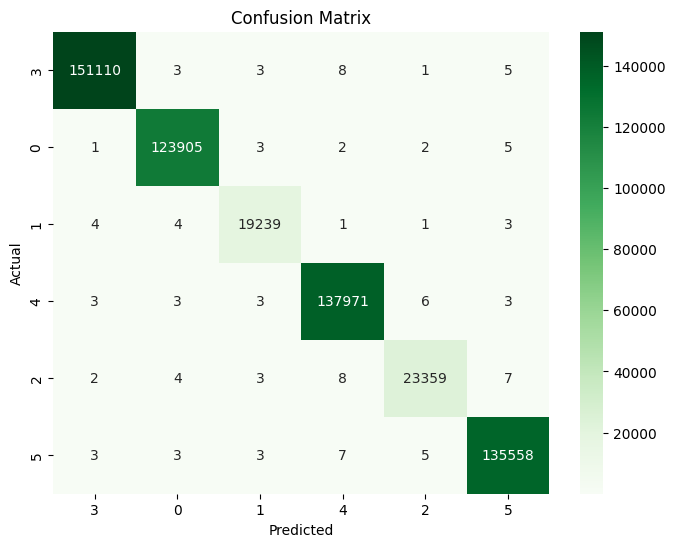

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
X_pred = classifier.predict(X_train)

cm = confusion_matrix(y_train, X_pred)
labels = train_data["cluster_catgeory"].unique()

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(f"XGBoost Train Model Accuracy: {accuracy_score(y_train, X_pred)}")

XGBoost Train Model Accuracy: 0.9998156451321013


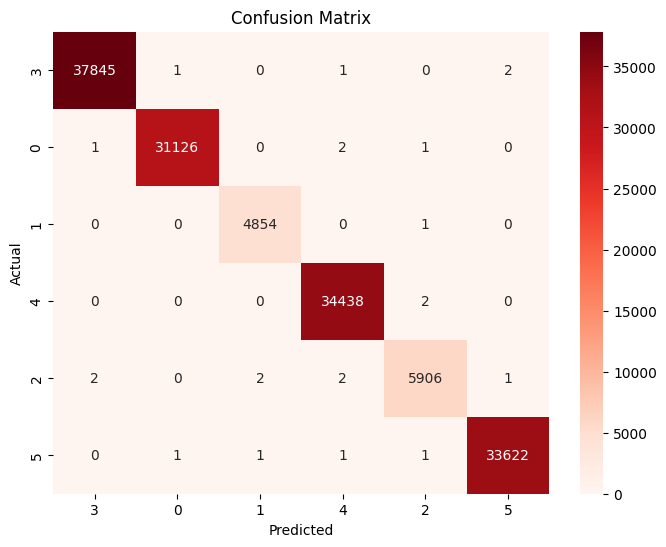

In [ ]:
cm = confusion_matrix(y_test, y_pred)
labels = train_data["cluster_catgeory"].unique()

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(f"XGBoost Test Model Accuracy: {accuracy_score(y_test, y_pred)}")

XGBoost Test Model Accuracy: 0.9998511632941622


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))
print("Total Error: {:.2f}%".format((1 - accuracies).mean()*100))

Accuracy: 99.98 %
Standard Deviation: 0.00%
Total Error: 0.02%


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37849
           1       1.00      1.00      1.00     31130
           2       1.00      1.00      1.00      4855
           3       1.00      1.00      1.00     34440
           4       1.00      1.00      1.00      5913
           5       1.00      1.00      1.00     33626

    accuracy                           1.00    147813
   macro avg       1.00      1.00      1.00    147813
weighted avg       1.00      1.00      1.00    147813



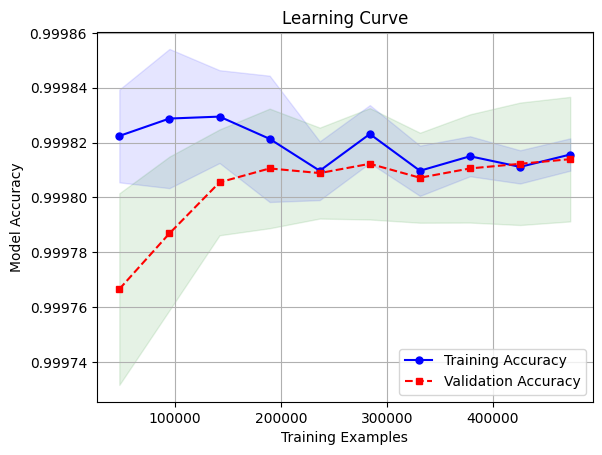

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator = classifier, X = X_train, y =  y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue', marker = 'o', markersize = 5)
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color = 'blue')
plt.plot(train_sizes, test_mean, color='red', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')
plt.grid()
plt.xlabel('Training Examples')
plt.ylabel('Model Accuracy')
plt.title('Learning Curve')
plt.legend(loc='lower right')
plt.show()

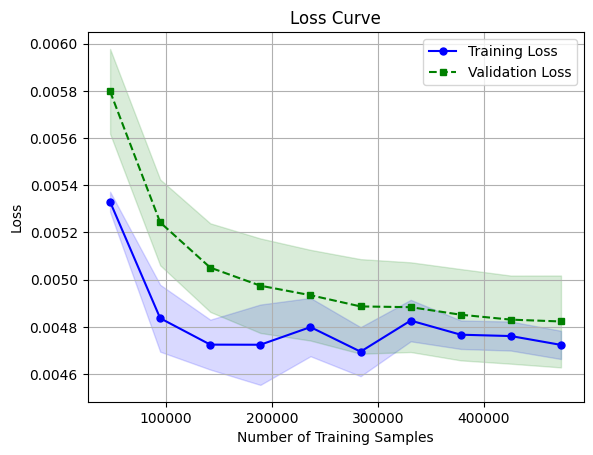

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator = classifier, X = X_train,
                                                        y = y_train, cv = 5, scoring = 'neg_log_loss',
                                                        train_sizes = np.linspace(0.1, 1.0, 10),
                                                        n_jobs = -1)

train_mean = -np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = -np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

plt.plot(train_sizes, train_mean, color = 'blue', marker = 'o', markersize = 5, label = 'Training Loss')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha = 0.15, color = 'blue')
plt.plot(train_sizes, test_mean, color = 'green', linestyle = '--', marker = 's', markersize = 5, label = 'Validation Loss')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha = 0.15, color = 'green')

plt.grid()
plt.xlabel('Number of Training Samples')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend(loc = 'upper right')
plt.show()

**SVM MODEL**

In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Loading the dataset
data = pd.read_csv('preprocessed_data.csv')
print("Data Preview:\n", data.head())
print("\nTarget Class Distribution:\n", data['cluster_catgeory'].value_counts())

Data Preview:
    Customer_ID outlet_city  luxury_sales  fresh_sales  dry_sales  \
0     10493832    Kelaniya       1209.60       756.00    5292.00   
1     10178643    Moratuwa       1590.12      1060.08    6007.12   
2     10513916     Wattala       2288.88      1481.04    9155.52   
3     10334589     Wattala       2274.94      1739.66    9099.76   
4     10458365    Kelaniya       2345.49      2069.55    9243.99   

   cluster_catgeory  
0                 4  
1                 1  
2                 4  
3                 4  
4                 4  

Target Class Distribution:
 cluster_catgeory
1    188979
4    172429
6    169205
2    155048
5     29296
3     24107
Name: count, dtype: int64


In [ ]:
# Defining Features and Target
X = data.drop(['Customer_ID', 'cluster_catgeory'], axis=1)
y = data['cluster_catgeory']

data.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
0,10493832,Kelaniya,1209.60,756.00,5292.00,4
1,10178643,Moratuwa,1590.12,1060.08,6007.12,1
2,10513916,Wattala,2288.88,1481.04,9155.52,4
3,10334589,Wattala,2274.94,1739.66,9099.76,4
4,10458365,Kelaniya,2345.49,2069.55,9243.99,4


In [ ]:
# Splitting Train and Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Identify categorical columns
categorical_columns = X_train.select_dtypes(include=['object']).columns

In [ ]:
# Create column transformer to encode categorical features
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(handle_unknown='ignore'), categorical_columns)],
    remainder='passthrough'
)

In [ ]:
# Apply column transformer to training and test sets
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [ ]:
# Feature Scaling
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# SVM hyperparameter tuning with grid search
param_grid = {
    'C': [1, 10],
    'gamma': ['scale'],
    'kernel': ['linear']
}

grid_search = GridSearchCV(
    SVC(class_weight='balanced'),
    param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_scaled, y_train)
print("\nBest SVM Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits

Best SVM Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


In [ ]:
# Final SVM Model Training
svm_model = SVC(**grid_search.best_params_, class_weight='balanced', random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(C=1, class_weight='balanced', kernel='linear', random_state=42)

In [ ]:
# Predictions
y_train_pred = svm_model.predict(X_train_scaled)
y_test_pred = svm_model.predict(X_test_scaled)

In [ ]:
# Accuracy
print("\nTrain Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))


Train Accuracy: 0.999825793106481
Test Accuracy: 0.9998105714652974


In [ ]:
# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred))


Classification Report:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     37796
           2       1.00      1.00      1.00     31010
           3       1.00      1.00      1.00      4821
           4       1.00      1.00      1.00     34486
           5       1.00      1.00      1.00      5859
           6       1.00      1.00      1.00     33841

    accuracy                           1.00    147813
   macro avg       1.00      1.00      1.00    147813
weighted avg       1.00      1.00      1.00    147813



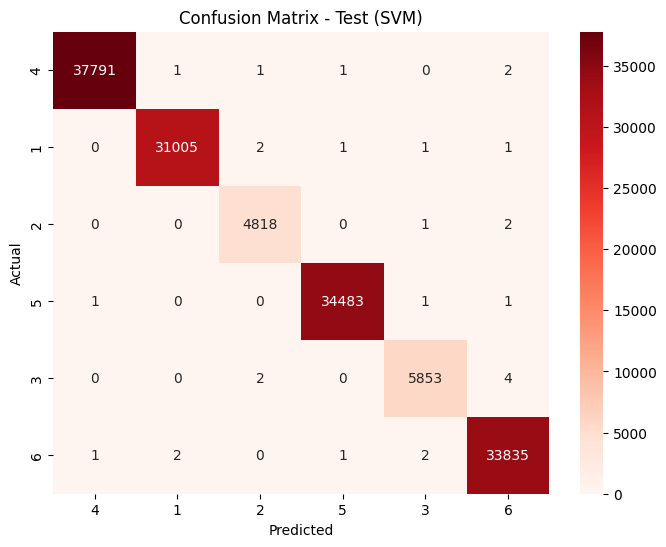

In [ ]:
# Confusion Matrix - Test
cm_test = confusion_matrix(y_test, y_test_pred)
labels = data["cluster_catgeory"].unique()
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test (SVM)')
plt.show()

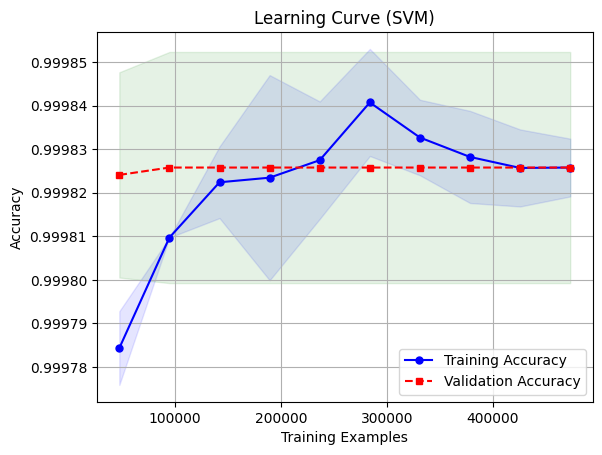

In [ ]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=svm_model,
    X=X_train_scaled,
    y=y_train,
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue', marker='o', markersize=5)
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.plot(train_sizes, test_mean, label='Validation Accuracy', color='red', linestyle='--', marker='s', markersize=5)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')
plt.grid()
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve (SVM)')
plt.legend(loc='lower right')
plt.show()

**RANDOM FOREST**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

In [ ]:
# Load data
df = pd.read_csv('/content/preprocessed_data (3).csv')

In [ ]:
# Drop Customer_ID
df = df.drop('Customer_ID', axis=1)

In [ ]:
# Encode outlet_city
le = LabelEncoder()
df['outlet_city'] = le.fit_transform(df['outlet_city'])

In [ ]:
# Drop rows with any missing values
df = df.dropna()

In [ ]:
# Define features and target
X = df.drop('cluster_catgeory', axis=1)
y = df['cluster_catgeory']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)

In [ ]:
# Predictions and Evaluation
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[37774     1     0    19     0     2]
 [    0 30994     2     1     1    12]
 [    0     0  4818     0     1     2]
 [    8     0     0 34476     1     1]
 [    0     0     2     0  5853     4]
 [    1    13     0     1     2 33824]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     37796
           2       1.00      1.00      1.00     31010
           3       1.00      1.00      1.00      4821
           4       1.00      1.00      1.00     34486
           5       1.00      1.00      1.00      5859
           6       1.00      1.00      1.00     33841

    accuracy                           1.00    147813
   macro avg       1.00      1.00      1.00    147813
weighted avg       1.00      1.00      1.00    147813



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Get the predicted and actual values
y_pred = rf.predict(X_test)

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = confusion_matrix(y_test, y_pred, normalize='true')  # normalized by row (recall)

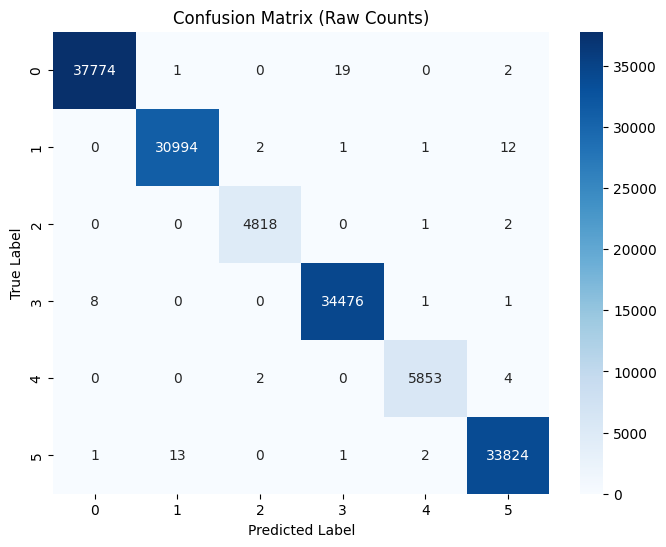

In [ ]:
# Plot raw confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Raw Counts)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

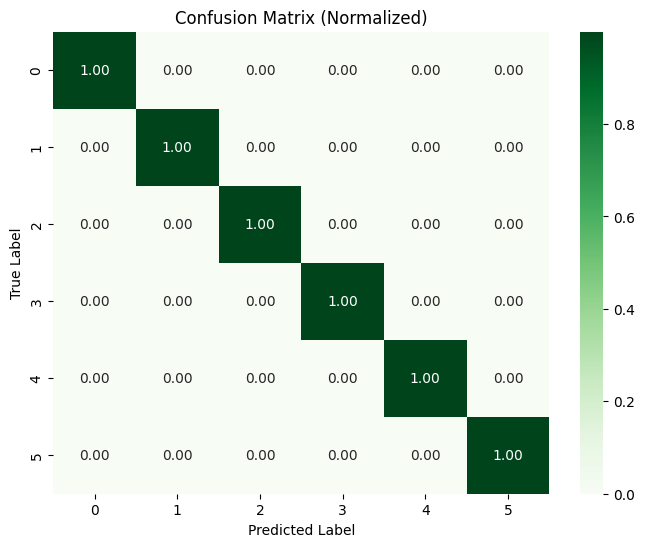

In [ ]:
# Plot normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Greens')
plt.title("Confusion Matrix (Normalized)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# Get feature importances from the trained Random Forest model
importances = rf.feature_importances_
feature_names = X.columns

In [ ]:
# Create a DataFrame for better plotting
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

<ipython-input-83-5edf0a3a05bf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


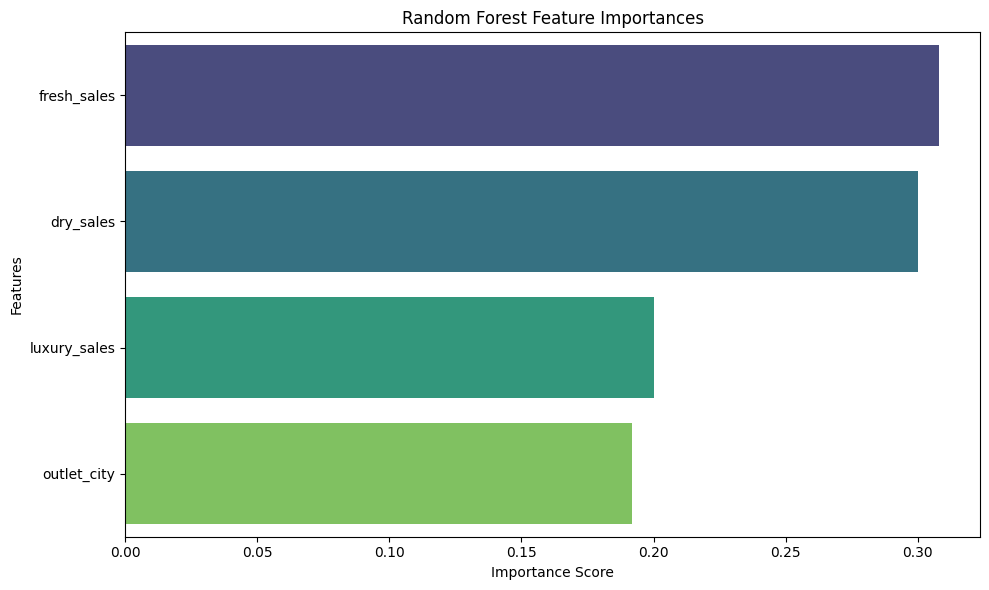

In [ ]:
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
# Predictions on both sets
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [ ]:
# Accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [ ]:
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy:  {test_accuracy:.4f}")

Training Accuracy: 1.0000
Testing Accuracy:  0.9995


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy', n_jobs=-1)
print(f"Cross-validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")

Cross-validation Accuracy Scores: [0.99895814 0.99954672 0.9996482  0.99952643 0.9991611 ]
Mean CV Accuracy: 0.9994


Decision Tree

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Import Libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#Load Data from Google Drive
file_path = '/content/drive/MyDrive/preprocessed_data (3).csv'
df = pd.read_csv(file_path)

In [3]:
#Drop unused column
df.drop(columns=['Customer_ID'], inplace=True)

#Encode 'outlet_city' using LabelEncoder
le = LabelEncoder()
df['outlet_city'] = le.fit_transform(df['outlet_city'])

In [4]:
#Split into features and target
X = df.drop(columns=['cluster_catgeory'])
y = df['cluster_catgeory']

In [5]:
#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

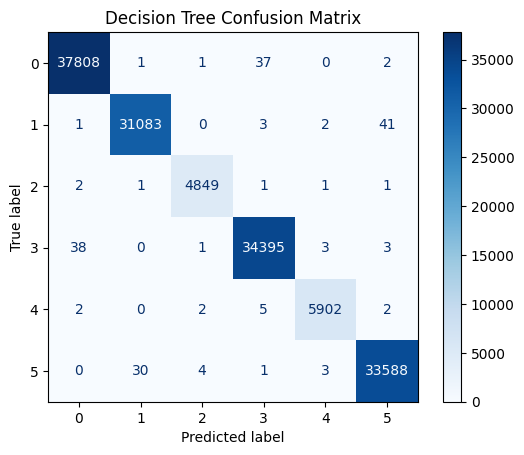

In [7]:
#Predict and display confusion matrix
y_pred = dt_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Decision Tree Confusion Matrix")
plt.show()

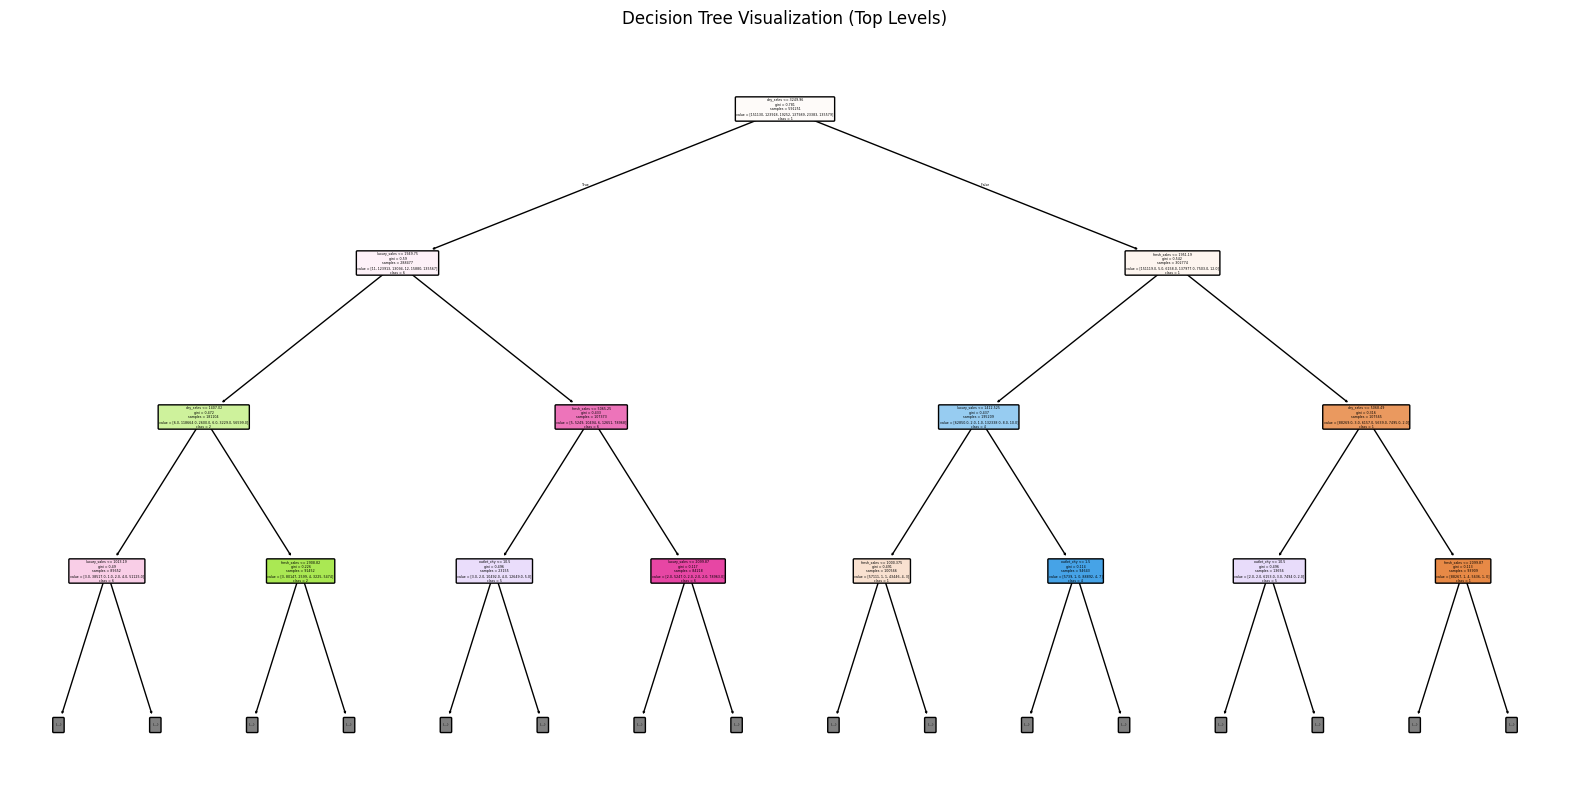

In [8]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the top 3 levels of the decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    filled=True,
    feature_names=X.columns,
    class_names=[str(cls) for cls in sorted(y.unique())],
    rounded=True,
    max_depth=3  # You can increase this if needed
)
plt.title("Decision Tree Visualization (Top Levels)")
plt.show()